In [60]:
## Cargar las librerias necesrias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay

## Leer los datos del archivo csv
data_jmojica = pd.read_csv('heart_cleveland_upload.csv')

## Mostar dataset
print()
print("Confirmar lectura de Dataset y mostrar en pantalla")
print()
data_jmojica.head()


Confirmar lectura de Dataset y mostrar en pantalla



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [29]:
# Descripción de los datos
data_jmojica.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [30]:
## Buscar datos nulos en el df
resp1 = data_jmojica.isnull().any().any()
print()
print ("Evaluando valores faltantes en el df")
print()
print("¿Existen valores nulos en el df?")
print(f"Rta: {resp1}")
print()
## Buscar datos vacios en el df
#print(df.isna().sum())


Evaluando valores faltantes en el df

¿Existen valores nulos en el df?
Rta: False



Text(0.5, 1.0, 'Identificación de Datos Atípicos')

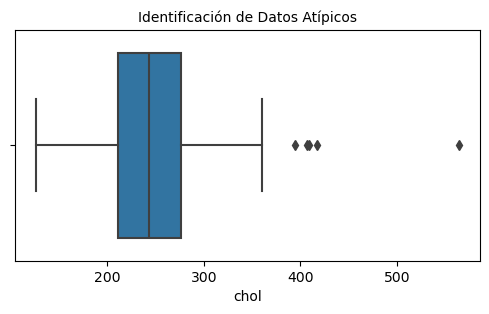

In [38]:
## Reprocesando validacion de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_jmojica['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [42]:
data_jmojica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        252 non-null    int64  
 1   sex        252 non-null    int64  
 2   cp         252 non-null    int64  
 3   trestbps   252 non-null    int64  
 4   chol       252 non-null    int64  
 5   fbs        252 non-null    int64  
 6   restecg    252 non-null    int64  
 7   thalach    252 non-null    int64  
 8   exang      252 non-null    int64  
 9   oldpeak    252 non-null    float64
 10  slope      252 non-null    int64  
 11  ca         252 non-null    int64  
 12  thal       252 non-null    int64  
 13  condition  252 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.5 KB


In [45]:
data_jmojica['condition'].value_counts()

condition
0    137
1    115
Name: count, dtype: int64

In [53]:
## Extraemos los datos que vamos a analizar
X = data_jmojica.drop('condition', axis=1)
Y = data_jmojica['condition']

# Asegurar que haya al menos 2 ejemplos por clase en ambos conjuntos de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [54]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)

prediccion = modelo_regresion.predict(X_test)

In [55]:
print (prediccion)

[1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0]


In [56]:
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        48
           1       0.87      0.75      0.81        36

    accuracy                           0.85        84
   macro avg       0.85      0.83      0.84        84
weighted avg       0.85      0.85      0.84        84



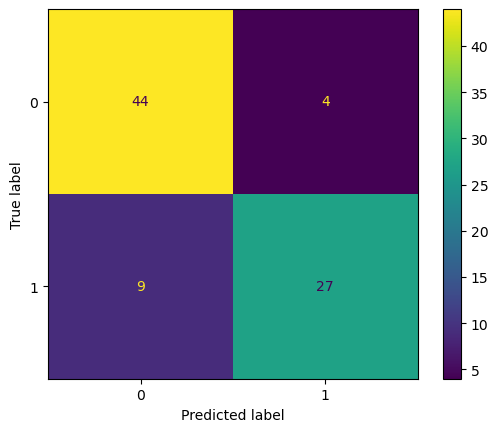

In [58]:
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

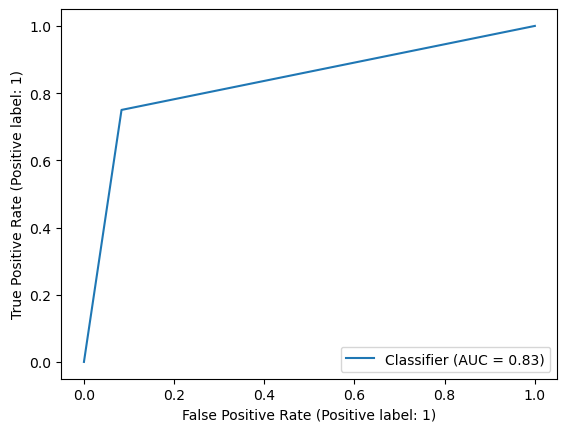

In [62]:
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()